In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet18_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter,saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.306, ECE: 0.032
Optimal temperature: 0.984
After temperature - NLL: 1.305, ECE: 0.029


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9689 ± 0.0011
Final Average Prediction Set Size: 30.99 ± 0.78
Final Average Coverage: 0.9489 ± 0.0019
Final Average Real Probability: 0.8952 ± 0.0028


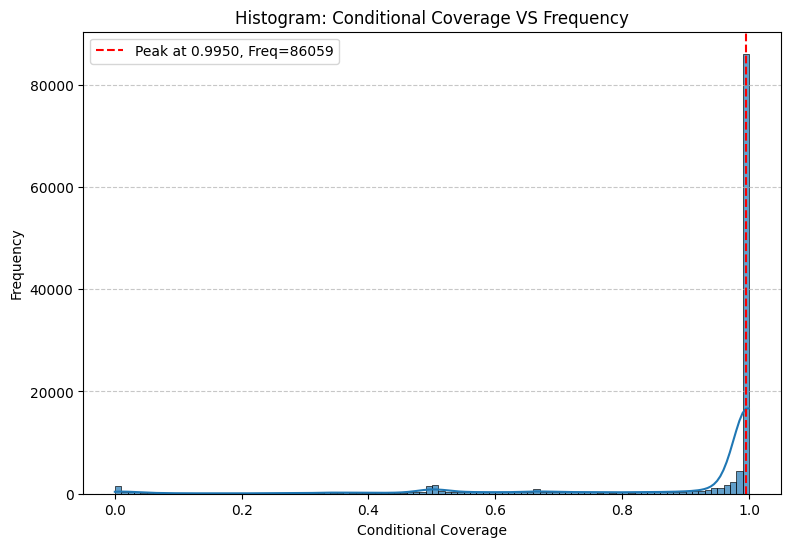

86059 (69.20%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0083 ± 0.0029
Final Average Prediction Set Size: 11.45 ± 0.24
Final Average Coverage: 0.9499 ± 0.0012
Final Average Real Probability: 0.8790 ± 0.0022


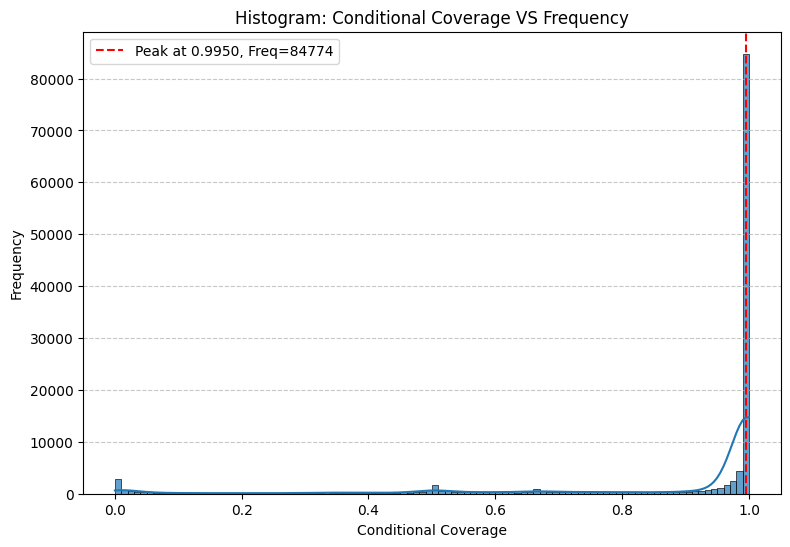

84774 (68.17%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.01, k_reg=7, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0163 ± 0.0055
Final Average Prediction Set Size: 11.14 ± 0.17
Final Average Coverage: 0.9492 ± 0.0018
Final Average Real Probability: 0.8838 ± 0.0030


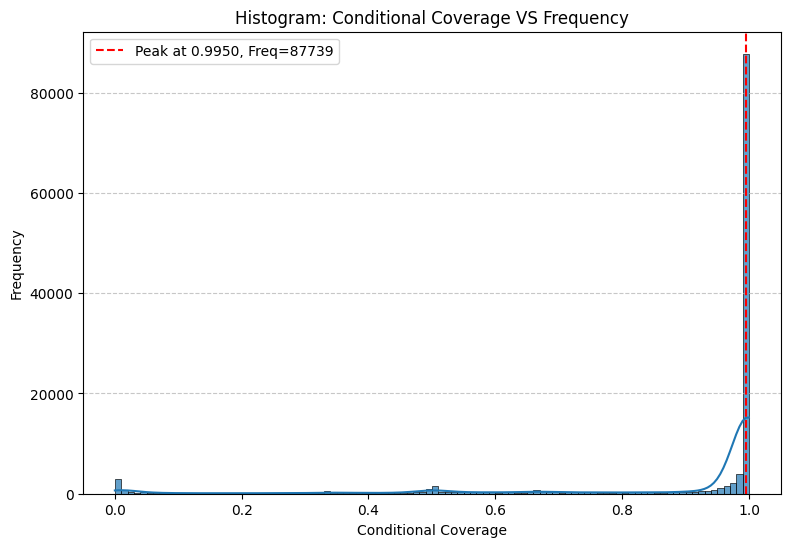

87739 (70.55%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.03, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9689 ± 0.0011
Final Average Prediction Set Size: 30.99 ± 0.78
Final Average Coverage: 0.9489 ± 0.0019
Final Average Real Probability: 0.8952 ± 0.0028


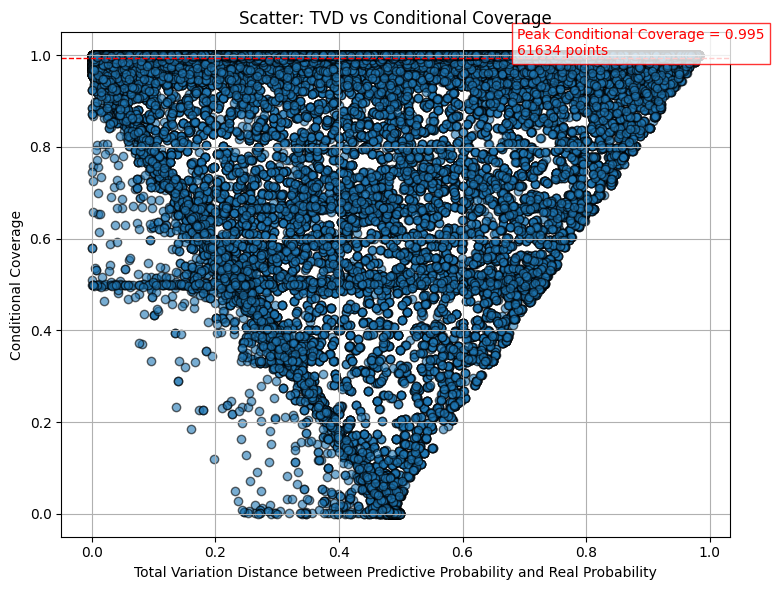

Peak Conditional Coverage = 0.995, with 61634 samples

=== Count Regions Summary ===
36360 (29.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
43405 (34.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
16307 (13.1%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.86554', '0.05051', '0.04592', '0.01567']
  Real Probability Set      : ['0.94725', '0.01250', '0.00301', '0.00046']
Sample 2:
  Predictive Probability Set: ['0.94335', '0.02561']
  Real Probability Set      : ['0.99425', '0.00287']
Sample 3:
  Predictive Probability Set: ['0.92449', '0.01384', '0.00727', '0.00444', '0.00439', '0.00318', '0.00290', '0.00257', '0.00249', '0.00217']
  Real Probability Set      : ['0.98169', '0.00000', '0.00070', '0.00000', '0.00000', '0.00070', '0.00000', '0.00000', '0.00000', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Se

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0083 ± 0.0029
Final Average Prediction Set Size: 11.45 ± 0.24
Final Average Coverage: 0.9499 ± 0.0012
Final Average Real Probability: 0.8790 ± 0.0022


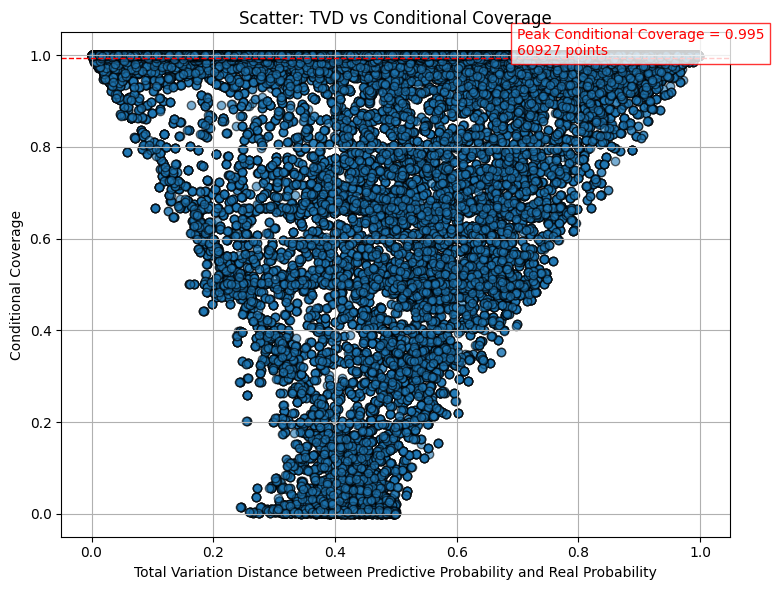

Peak Conditional Coverage = 0.995, with 60927 samples

=== Count Regions Summary ===
35769 (28.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
43217 (34.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
14910 (12.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.93713', '0.02218', '0.01781', '0.00839', '0.00512', '0.00145', '0.00075', '0.00071']
  Real Probability Set      : ['0.99639', '0.00000', '0.00000', '0.00180', '0.00000', '0.00000', '0.00180', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.83264', '0.13611', '0.00845', '0.00755', '0.00414', '0.00229', '0.00137']
  Real Probability Set      : ['0.90175', '0.04177', '0.03070', '0.01230', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.88897', '0.00796', '0.00697', '0.00684', '0.00556', '0.00527', '0.00436', '0.00305', '0.00284', '0.00277', '0.00260', '0.00257', 

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.01, k_reg=7, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0163 ± 0.0055
Final Average Prediction Set Size: 11.14 ± 0.17
Final Average Coverage: 0.9492 ± 0.0018
Final Average Real Probability: 0.8838 ± 0.0030


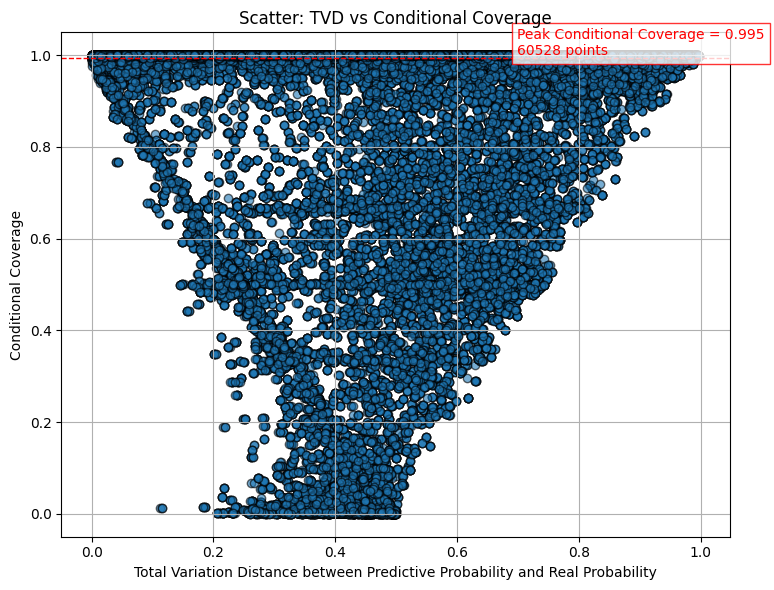

Peak Conditional Coverage = 0.995, with 60528 samples

=== Count Regions Summary ===
34451 (27.7%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
42463 (34.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
14643 (11.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.88432', '0.09288', '0.01215', '0.00380', '0.00114']
  Real Probability Set      : ['0.97224', '0.02326', '0.00449', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.96962', '0.02417', '0.00326']
  Real Probability Set      : ['0.99906', '0.00031', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.51145', '0.48554', '0.00096', '0.00064', '0.00047', '0.00010', '0.00007', '0.00007', '0.00007', '0.00006', '0.00005', '0.00004', '0.00004', '0.00004', '0.00004', '0.00003', '0.00002', '0.00002']
  Real Probability Set      : ['0.49264', '0.50686', '0.00050', '0.00000', '0.00000', '0

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.03, num_runs=10, alpha=0.05)